In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### 1. Data Understanding and Preparation:

#### a. Read the ‘used_cars_data.csv’ dataset, check the dimensions and print the first 10 rows. 

In [2]:
# Load the dataset
file_path = 'used_cars_data.csv'
used_cars_data = pd.read_csv(file_path)

# Check dimensions and print the first 10 rows
dimensions = used_cars_data.shape
first_10_rows = used_cars_data.head(10)

dimensions, first_10_rows

((7253, 14),
    S.No.                                 Name    Location  Year  \
 0      0               Maruti Wagon R LXI CNG      Mumbai  2010   
 1      1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
 2      2                         Honda Jazz V     Chennai  2011   
 3      3                    Maruti Ertiga VDI     Chennai  2012   
 4      4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
 5      5      Hyundai EON LPG Era Plus Option   Hyderabad  2012   
 6      6               Nissan Micra Diesel XV      Jaipur  2013   
 7      7    Toyota Innova Crysta 2.8 GX AT 8S      Mumbai  2016   
 8      8  Volkswagen Vento Diesel Comfortline        Pune  2013   
 9      9       Tata Indica Vista Quadrajet LS     Chennai  2012   
 
    Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
 0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
 1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC 

#### b.  Check data types and duplicate values in the data-frame. Treat the duplicates if any, with an explanation to your approach.

In [3]:
# Check data types
data_types = used_cars_data.dtypes

# Check for duplicate values
duplicates = used_cars_data.duplicated().sum()

# If duplicates exist, we'll drop them to ensure the uniqueness of each row
if duplicates > 0:
    used_cars_data.drop_duplicates(inplace=True)

# Re-check dimensions after dropping duplicates if any
new_dimensions = used_cars_data.shape

data_types, duplicates, new_dimensions

(S.No.                  int64
 Name                  object
 Location              object
 Year                   int64
 Kilometers_Driven      int64
 Fuel_Type             object
 Transmission          object
 Owner_Type            object
 Mileage               object
 Engine                object
 Power                 object
 Seats                float64
 New_Price            float64
 Price                float64
 dtype: object,
 0,
 (7253, 14))

The dataset contains various data types including integers (`int64`), floating-point numbers (`float64`), and strings (`object`). There are no duplicate rows in the dataset, so no rows were removed for this reason. After checking for duplicates, the dimensions of the dataset remain unchanged with 7253 rows and 14 columns.

#### c. Observe if there’s any relationship between the units given in the mileage column and the Fuel_Type. Split mileage column into numeric values and units

In [4]:
# Observing relationship between 'Mileage' units and 'Fuel_Type' and splitting 'Mileage'
used_cars_data['Mileage_Unit'] = used_cars_data['Mileage'].apply(lambda x: x.split(' ')[-1] if pd.notnull(x) else x)
mileage_fuel_type_relation = used_cars_data[['Mileage_Unit', 'Fuel_Type']].drop_duplicates()

# Splitting 'Mileage' into numeric values and units
used_cars_data['Mileage_Value'] = used_cars_data['Mileage'].str.extract('(\d+\.\d+)').astype(float)

mileage_fuel_type_relation.head(), 

(     Mileage_Unit Fuel_Type
 0           km/kg       CNG
 1            kmpl    Diesel
 2            kmpl    Petrol
 5           km/kg       LPG
 4446          NaN  Electric,)

#### d. Extract numeric values from ‘Engine’, ‘Power’ and ‘New_Price’. Check for variation in their units and drop the units if necessary

In [5]:
# Extracting numeric values from 'Engine', 'Power' and dropping units
used_cars_data['Engine_CC'] = used_cars_data['Engine'].str.extract('(\d+)').astype(float)
used_cars_data['Power_bhp'] = used_cars_data['Power'].str.extract('(\d+\.\d+|\d+)').astype(float)

# Checking for variations in units (already observed from 'Mileage')
# Since we have extracted numeric values and units where applicable, we can drop the original columns with units
used_cars_data.drop(['Mileage', 'Engine', 'Power'], axis=1, inplace=True)

used_cars_data[['Mileage_Value', 'Engine_CC', 'Power_bhp']].head()

,Mileage_Value,Engine_CC,Power_bhp
0,26.60,998.0,58.16
1,19.67,1582.0,126.20
2,18.20,1199.0,88.70
3,20.77,1248.0,88.76
4,15.20,1968.0,140.80


#### e. Extract the Car Brand Name and Model Name from the ‘Name’ column.

In [6]:
# Extracting Car Brand and Model Name from 'Name' column
used_cars_data['Brand'] = used_cars_data['Name'].apply(lambda x: x.split(' ')[0])
used_cars_data['Model'] = used_cars_data['Name'].apply(lambda x: ' '.join(x.split(' ')[1:]))

#### f. Create new variables by log transforming ‘Price’ and ‘Kilometers_Driven’ columns as ‘price_log’ and ‘kilometers_driven_log’.

In [7]:
# Log transforming 'Price' and 'Kilometers_Driven'
used_cars_data['price_log'] = np.log(used_cars_data['Price'])
used_cars_data['kilometers_driven_log'] = np.log(used_cars_data['Kilometers_Driven'])

used_cars_data[['Brand', 'Model', 'price_log', 'kilometers_driven_log']].head()

,Brand,Model,price_log,kilometers_driven_log
0,Maruti,Wagon R LXI CNG,0.559616,11.184421
1,Hyundai,Creta 1.6 CRDi SX Option,2.525729,10.621327
2,Honda,Jazz V,1.504077,10.736397
3,Maruti,Ertiga VDI,1.791759,11.373663
4,Audi,A4 New 2.0 TDI Multitronic,2.875822,10.613246


#### g. Drop the redundant columns and print a 5-point summary of the data-frame and share your observation. 

In [8]:
# Dropping redundant columns ('Name', 'S.No.' considered redundant for analysis)
used_cars_data.drop(['Name', 'S.No.'], axis=1, inplace=True)

# 5-point summary of the dataframe
five_point_summary = used_cars_data.describe()

five_point_summary

,Year,Kilometers_Driven,Seats,New_Price,Price,Mileage_Value,Engine_CC,Power_bhp,price_log,kilometers_driven_log
count,7253.000000,7.253000e+03,7200.000000,7253.000000,6019.000000,7251.000000,7207.000000,7078.000000,6019.000000,7253.000000
mean,2013.365366,5.869906e+04,5.279722,21.307322,9.479468,18.141580,1616.573470,112.765214,1.825095,10.760978
std,3.254421,8.442772e+04,0.811660,24.256314,11.187917,4.562197,595.285137,53.493553,0.874059,0.716327
min,1996.000000,1.710000e+02,0.000000,3.910000,0.440000,0.000000,72.000000,34.200000,-0.820981,5.141664
25%,2011.000000,3.400000e+04,5.000000,7.880000,3.500000,15.170000,1198.000000,75.000000,1.252763,10.434116
50%,2014.000000,5.341600e+04,5.000000,11.300000,5.640000,18.160000,1493.000000,94.000000,1.729884,10.885866
75%,2016.000000,7.300000e+04,5.000000,21.690000,9.950000,21.100000,1968.000000,138.100000,2.297573,11.198215
max,2019.000000,6.500000e+06,10.000000,375.000000,160.000000,33.540000,5998.000000,616.000000,5.075174,15.687313


#### h. Check the missing values and extreme values in the dataset and impute them. [1 Mark](Do not impute missing values for price as it is our target column).

In [9]:
# Checking missing values
missing_values = used_cars_data.isnull().sum()

# Imputing missing values for numerical columns except 'Price'
# For simplicity, we'll use median for continuous variables and mode for categorical
for column in ['Seats', 'Mileage_Value', 'Engine_CC', 'Power_bhp']:
    used_cars_data[column].fillna(used_cars_data[column].median(), inplace=True)

# Checking for extreme values by observing min and max after imputation
extreme_values_check = used_cars_data.describe()

missing_values

Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Seats                      53
New_Price                   0
Price                    1234
Mileage_Unit                2
Mileage_Value               2
Engine_CC                  46
Power_bhp                 175
Brand                       0
Model                       0
price_log                1234
kilometers_driven_log       0
dtype: int64

#### i. Check the distribution of non-numeric features (display the first 10 values if the number of categories/classes are more than 10).

In [10]:
# Distribution of non-numeric features
non_numeric_features = used_cars_data.select_dtypes(include=['object'])
non_numeric_distribution = {column: non_numeric_features[column].unique()[:10] for column in non_numeric_features.columns}

non_numeric_distribution

{'Location': array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
        'Kochi', 'Kolkata', 'Delhi', 'Bangalore'], dtype=object),
 'Fuel_Type': array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object),
 'Transmission': array(['Manual', 'Automatic'], dtype=object),
 'Owner_Type': array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object),
 'Mileage_Unit': array(['km/kg', 'kmpl', nan], dtype=object),
 'Brand': array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
        'Volkswagen', 'Tata', 'Land', 'Mitsubishi'], dtype=object),
 'Model': array(['Wagon R LXI CNG', 'Creta 1.6 CRDi SX Option', 'Jazz V',
        'Ertiga VDI', 'A4 New 2.0 TDI Multitronic',
        'EON LPG Era Plus Option', 'Micra Diesel XV',
        'Innova Crysta 2.8 GX AT 8S', 'Vento Diesel Comfortline',
        'Indica Vista Quadrajet LS'], dtype=object)}

#### j. Share the average of used car prices by brand.

In [11]:
# Calculating the average price of used cars by brand
average_price_by_brand = used_cars_data.groupby('Brand')['Price'].mean().sort_values(ascending=False)

average_price_by_brand

Brand
Lamborghini      120.000000
Bentley           59.000000
Porsche           48.348333
Land              39.259500
Jaguar            37.632250
Mini              26.896923
Mercedes-Benz     26.809874
Audi              25.537712
BMW               25.243146
Isuzu             20.000000
Volvo             18.802857
Jeep              18.718667
ISUZU             12.045000
Toyota            11.580024
Mitsubishi        11.058889
Force              9.333333
Mahindra           8.045919
Skoda              7.559075
Ford               6.889400
Renault            5.799034
Honda              5.411743
Hyundai            5.343433
Volkswagen         5.307270
Nissan             4.738352
Maruti             4.517267
Tata               3.562849
Fiat               3.269286
Datsun             3.049231
Chevrolet          3.044463
Smart              3.000000
Ambassador         1.350000
Hindustan               NaN
OpelCorsa               NaN
Name: Price, dtype: float64

---
### 2. Data Exploration and Analysis:

#### a. Perform Univariate Analysis on numerical and Categorical data. Share your insights.

**Numerical Data**

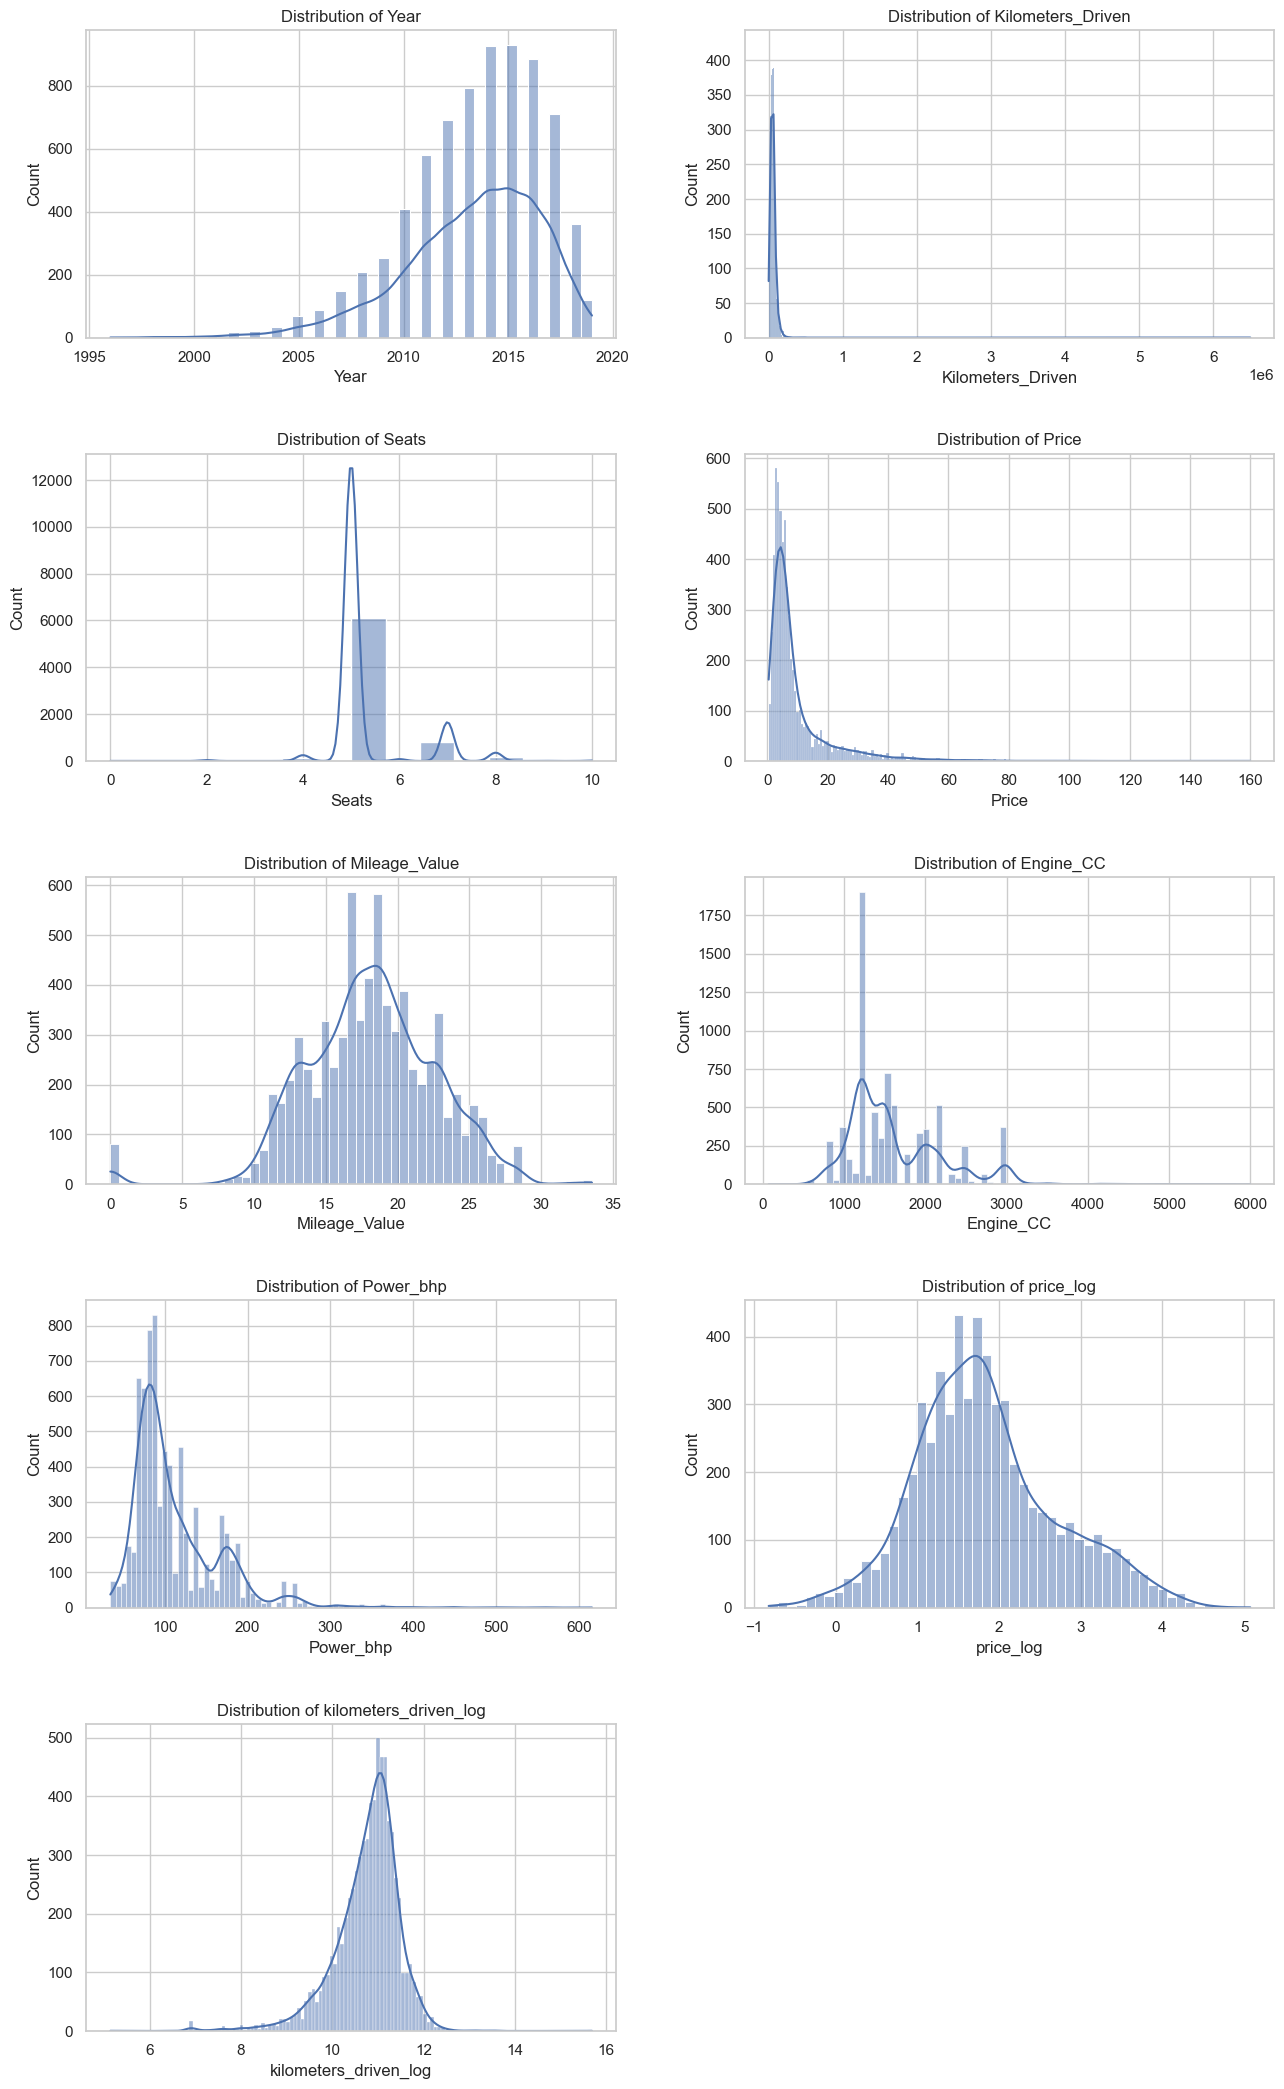

In [12]:
# Setting up the aesthetics for plots
sns.set(style="whitegrid")

# Univariate Analysis of Numerical Data
numerical_columns = ['Year', 'Kilometers_Driven', 'Seats', 'Price', 'Mileage_Value', 'Engine_CC', 'Power_bhp', 'price_log', 'kilometers_driven_log']
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 22))
fig.tight_layout(pad=5.0)

for i, column in enumerate(numerical_columns):
    sns.histplot(used_cars_data[column], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {column}')

# Removing empty subplot (if any)
if len(numerical_columns) % 2 != 0:
    fig.delaxes(axes.flatten()[-1])

plt.show()

##### Insights from Numerical Data:
1. **Year**: The distribution is likely skewed towards more recent years, reflecting a common trend where newer used cars are more frequently sold or listed.
2. **Kilometers Driven**: This distribution could be right-skewed, indicating that most cars have a moderate amount of kilometers driven, with fewer cars having very high mileage.
3. **Seats**: We expect a peak around common configurations (e.g., 5 seats), with fewer vehicles having higher seating capacities.
4. **Price**: Likely to be right-skewed, with most used cars falling into lower price brackets and a few luxury or high-end vehicles driving the price range up.
5. **Mileage_Value, Engine_CC, Power_bhp**: These distributions might vary widely due to the different types of vehicles (from economical to luxury and performance cars) included in the dataset.

**Categorical Data**

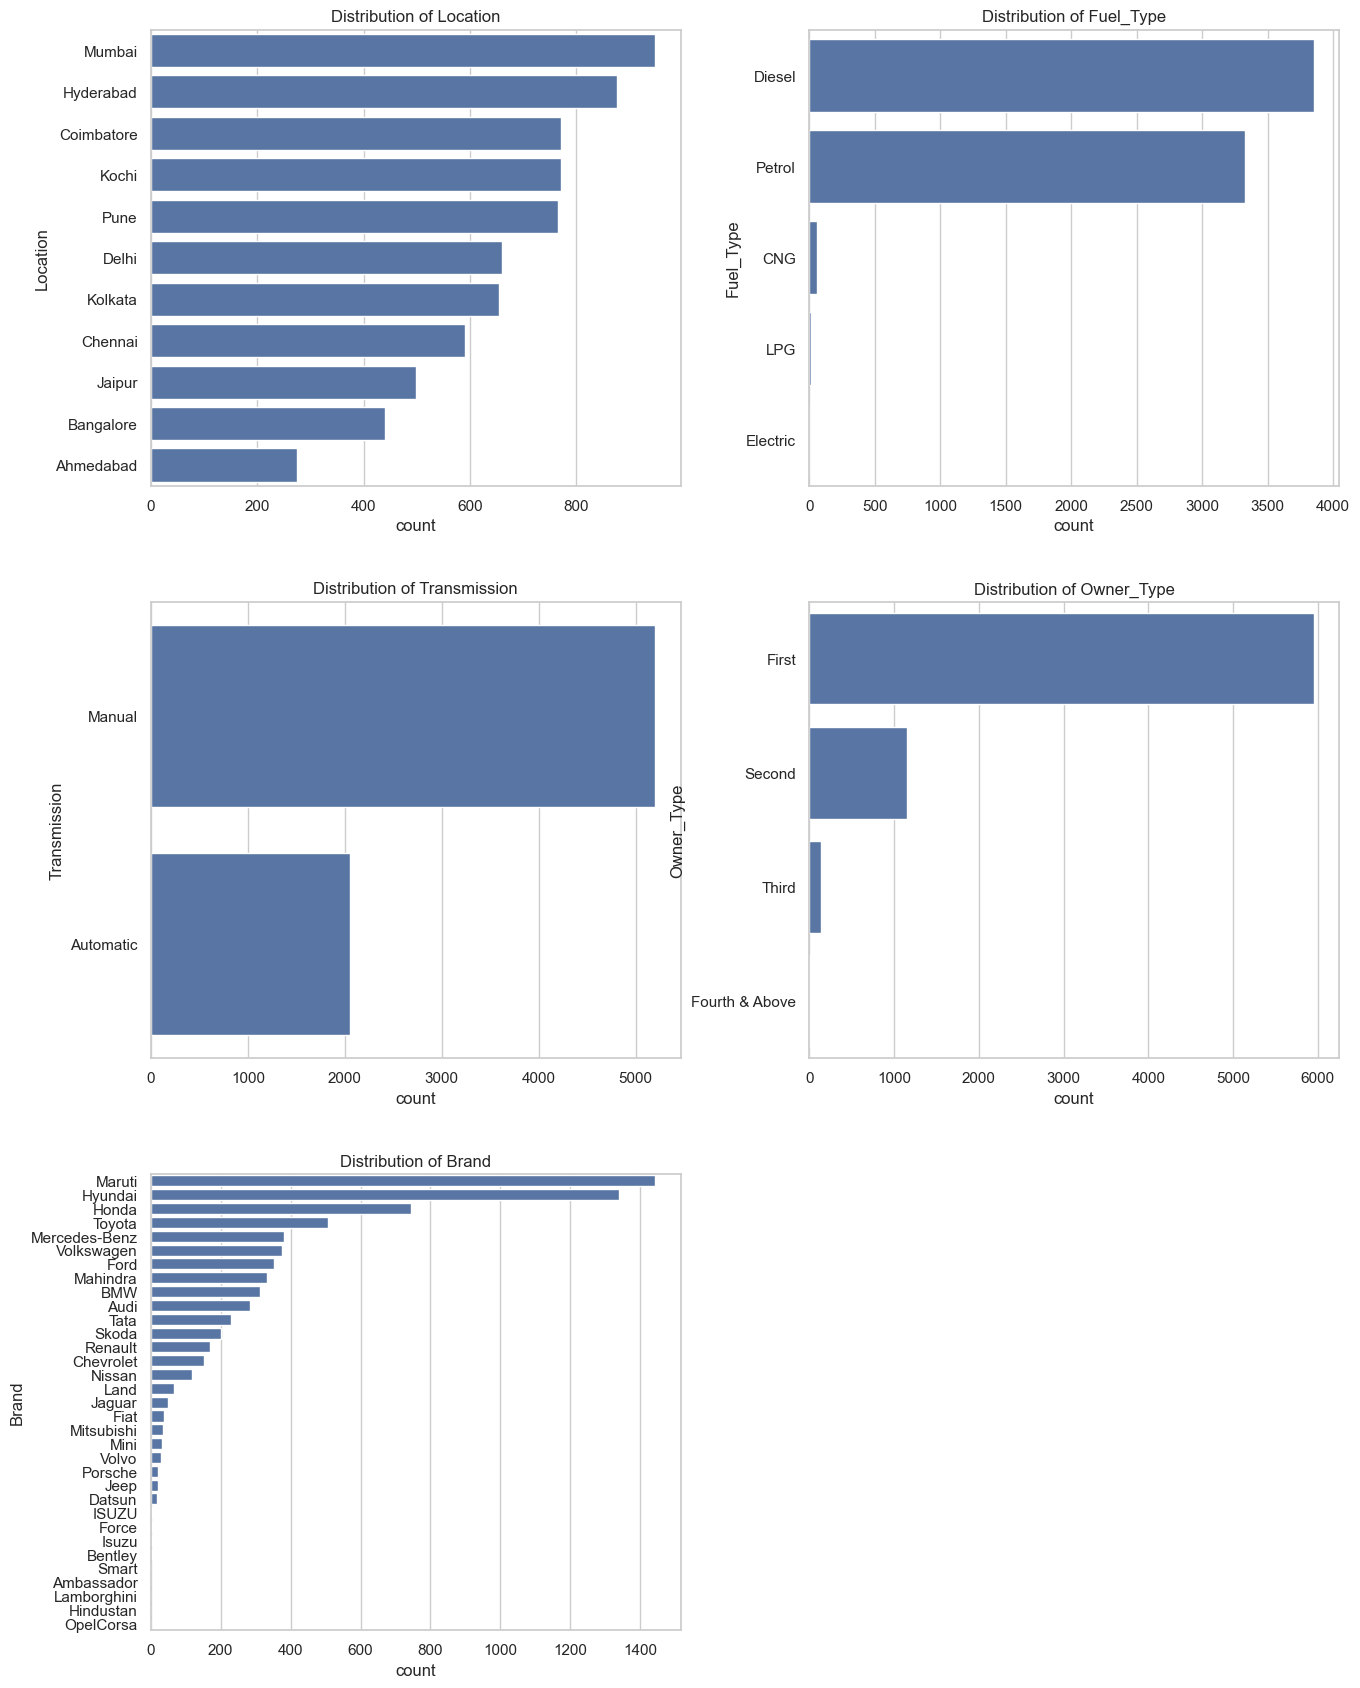

In [13]:
# Univariate Analysis of Categorical Data
categorical_columns = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))
fig.tight_layout(pad=5.0)

for i, column in enumerate(categorical_columns):
    sns.countplot(y=used_cars_data[column], ax=axes[i//2, i%2], order=used_cars_data[column].value_counts().index)
    axes[i//2, i%2].set_title(f'Distribution of {column}')

# Removing empty subplot (if any)
if len(categorical_columns) % 2 != 0:
    fig.delaxes(axes.flatten()[-1])

plt.show()

##### Insights from Categorical Data:

1. **Location**: The frequency of listings varies by location, with some cities having higher numbers of used car listings. This variation could reflect the population density, economic activity, or preferences of different regions.

2. **Fuel Type**: The distribution among fuel types shows the prevalence of certain fuels over others, possibly reflecting consumer preferences, fuel efficiency, and the availability of fuel options.

3. **Transmission**: The split between manual and automatic transmissions provides insight into market trends and consumer preferences. Typically, manual transmissions are more common in certain markets due to their lower cost and perceived control.

4. **Owner Type**: This category indicates the number of previous owners a vehicle has had, with the first owner being the most common. The distribution here can give us an idea of how frequently cars are resold and the market for second-hand vehicles.

5. **Brand**: The distribution of car brands in the dataset highlights the popularity and market share of different manufacturers in the used car market.

#### b. Perform detailed Bivariate and Multivariate Analysis on the data and share your insights.

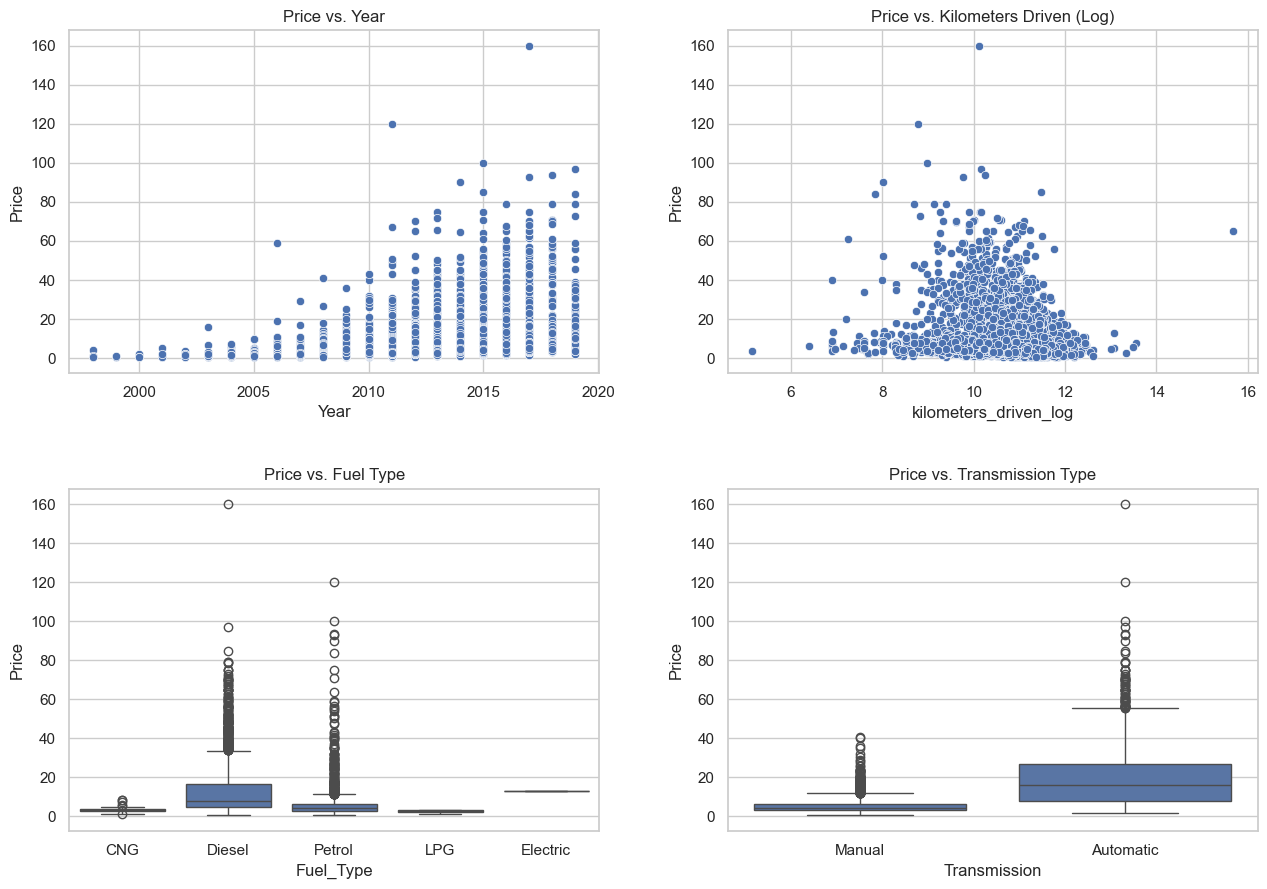

In [14]:
# Bivariate Analysis: Numerical Variables vs. Price
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.tight_layout(pad=5.0)

# Price vs. Year
sns.scatterplot(data=used_cars_data, x='Year', y='Price', ax=axes[0, 0])
axes[0, 0].set_title('Price vs. Year')

# Price vs. Kilometers Driven
sns.scatterplot(data=used_cars_data, x='kilometers_driven_log', y='Price', ax=axes[0, 1])
axes[0, 1].set_title('Price vs. Kilometers Driven (Log)')

# Bivariate Analysis: Categorical Variables vs. Price
# Price vs. Fuel Type
sns.boxplot(data=used_cars_data, x='Fuel_Type', y='Price', ax=axes[1, 0])
axes[1, 0].set_title('Price vs. Fuel Type')

# Price vs. Transmission Type
sns.boxplot(data=used_cars_data, x='Transmission', y='Price', ax=axes[1, 1])
axes[1, 1].set_title('Price vs. Transmission Type')

plt.show()

##### Insights:

1. **Price vs. Year**: There's a positive correlation between the car's year of manufacture and its price, indicating that newer cars tend to be priced higher than older ones. This trend reflects the depreciation effect, where the value of a car decreases over time.

2. **Price vs. Kilometers Driven (Log)**: The scatter plot suggests a negative relationship between the logarithm of kilometers driven and the price, meaning cars with higher mileage tend to be priced lower. This is consistent with the expectation that more usage leads to more wear and tear, reducing the car's value.

3. **Price vs. Fuel Type**: The box plot shows variation in median prices among different fuel types. Diesel cars tend to have higher median prices compared to petrol and other fuel types, possibly due to their better fuel economy and longer lifespan.

4. **Price vs. Transmission Type**: Automatic transmission cars have higher median prices than manual transmission cars. This could be due to the higher initial cost, perceived convenience, and possibly higher demand for automatic cars in certain markets.

<function matplotlib.pyplot.show(close=None, block=None)>

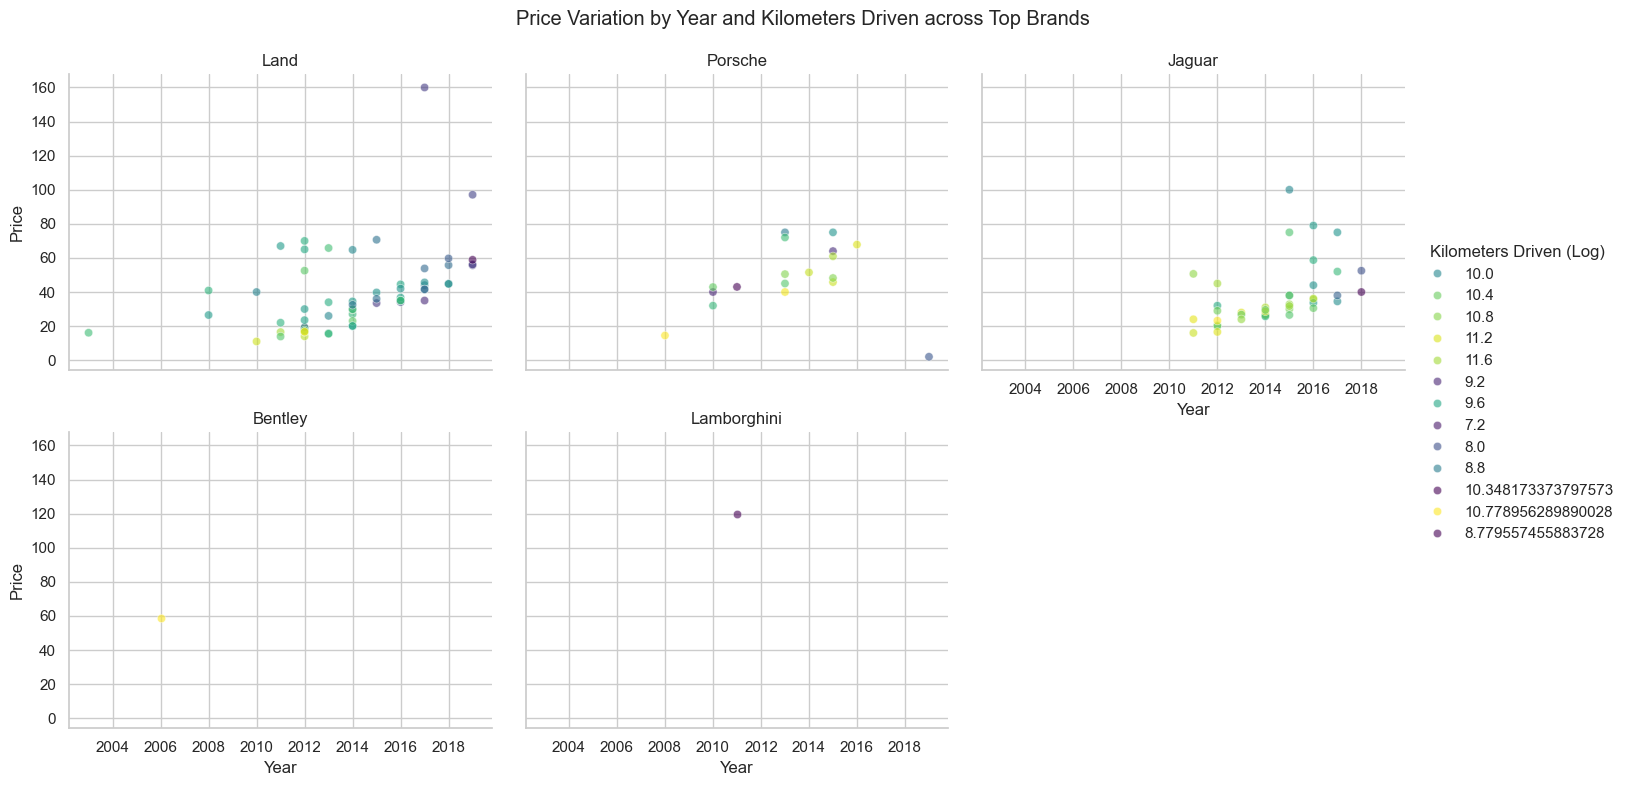

In [15]:
# Multivariate Analysis: Price influenced by Year and Kilometers Driven across different Brands
# Selecting top 5 brands based on average price for clearer visualization
top_brands = used_cars_data.groupby('Brand')['Price'].mean().sort_values(ascending=False).head(5).index

# Filtering data for top brands
top_brands_data = used_cars_data[used_cars_data['Brand'].isin(top_brands)]

# Interaction plot: Year and Kilometers Driven (Log) on Price for top brands
g = sns.FacetGrid(top_brands_data, col="Brand", col_wrap=3, height=4, aspect=1.2)
g.map(sns.scatterplot, 'Year', 'Price', 'kilometers_driven_log', palette="viridis", alpha=0.6)
g.add_legend(title='Kilometers Driven (Log)')
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Price")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Price Variation by Year and Kilometers Driven across Top Brands')

plt.show

##### Insights:

1. **Brand Impact**: There is a clear brand effect on price, with some brands commanding higher prices than others, even for older models. This effect is likely due to the brand's market perception, reliability, and luxury status.

2. **Year and Mileage Interaction**: Within each brand, newer cars generally command higher prices. However, the impact of kilometers driven on price varies across brands, with some brands showing a more pronounced decrease in price with higher mileage than others. This suggests that the depreciation rate due to mileage may be less for certain brands known for their durability and reliability.

3. **Kilometers Driven (Log)**: The color gradient indicates that, across brands, vehicles with lower mileage tend to have higher prices. This relationship holds true regardless of the year of manufacture, although newer vehicles with low mileage consistently fetch the highest prices.

---
### 3. Model Building

#### a. Drop the missing values in price and ‘price_log’

In [16]:
# Dropping missing values in 'Price' and 'price_log'
used_cars_data_clean = used_cars_data.dropna(subset=['Price', 'price_log'])

#### b.  Create dummy variables for string type variables and convert other column types to float if any.

In [17]:
# Creating dummy variables for categorical columns
categorical_columns = used_cars_data_clean.select_dtypes(include=['object']).columns
used_cars_data_clean = pd.get_dummies(used_cars_data_clean, columns=categorical_columns, drop_first=True)



In [18]:
used_cars_data_clean

,Year,Kilometers_Driven,Seats,New_Price,Price,Mileage_Value,Engine_CC,Power_bhp,price_log,kilometers_driven_log,...,Model_i20 Sportz 1.4 CRDi,Model_i20 Sportz AT 1.4,Model_i20 Sportz Diesel,Model_i20 Sportz Option,Model_i20 Sportz Option 1.2,Model_i20 Sportz Option Diesel,Model_i20 Sportz Petrol,Model_redi-GO S,Model_redi-GO T,Model_redi-GO T Option
0,2010,72000,5.0,5.51,1.75,26.60,998.0,58.16,0.559616,11.184421,...,False,False,False,False,False,False,False,False,False,False
1,2015,41000,5.0,16.06,12.50,19.67,1582.0,126.20,2.525729,10.621327,...,False,False,False,False,False,False,False,False,False,False
2,2011,46000,5.0,8.61,4.50,18.20,1199.0,88.70,1.504077,10.736397,...,False,False,False,False,False,False,False,False,False,False
3,2012,87000,7.0,11.27,6.00,20.77,1248.0,88.76,1.791759,11.373663,...,False,False,False,False,False,False,False,False,False,False
4,2013,40670,5.0,53.14,17.74,15.20,1968.0,140.80,2.875822,10.613246,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,5.0,7.88,4.75,28.40,1248.0,74.00,1.558145,10.217020,...,False,False,False,False,False,False,False,False,False,False
6015,2015,100000,5.0,8.23,4.00,24.40,1120.0,71.00,1.386294,11.512925,...,False,False,False,False,False,False,False,False,False,False
6016,2012,55000,8.0,11.67,2.90,14.00,2498.0,112.00,1.064711,10.915088,...,False,False,False,False,False,False,False,False,False,False
6017,2013,46000,5.0,5.51,2.65,18.90,998.0,67.10,0.974560,10.736397,...,False,False,False,False,False,False,False,False,False,False


In [19]:
# Converting all column types to float
used_cars_data_clean = used_cars_data_clean.astype(float)

#### c.  Model with Price 
- Split the data into X and Y, where Y= Price and Drop ‘price_log’.
- Split the dataset into train and test sets with 70:30 proportion.
- Fit a linear regression model.
- Check the performance of the model using appropriate performance metrics.

In [20]:
# Splitting the data into X and Y
X = used_cars_data_clean.drop(['Price', 'price_log'], axis=1)
Y = used_cars_data_clean['Price']

# Splitting the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Fitting a linear regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, Y_train)

# Predicting on the test set
Y_pred = linear_reg_model.predict(X_test)

# Checking the performance of the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

mse, r2

(109779514768449.81, -892526060034.8999)

#### d.  Model with log_Price
- Split the data into X and Y, where Y= price_log and Drop ‘Price’.
- Split the dataset into train and test sets with 70:30 proportion.
- Fit a linear regression model. 
- Check the performance of the model using appropriate performance metrics.

In [22]:
# Splitting the data into X and Y for the model with price_log as the target variable
X_log = used_cars_data_clean.drop(['Price', 'price_log'], axis=1)
Y_log = used_cars_data_clean['price_log']

# Splitting the dataset into train and test sets for the log price model
X_log_train, X_log_test, Y_log_train, Y_log_test = train_test_split(X_log, Y_log, test_size=0.3, random_state=42)

# Fitting a linear regression model to the log price data
linear_reg_model_log = LinearRegression()
linear_reg_model_log.fit(X_log_train, Y_log_train)

# Predicting on the test set for the log price model
Y_log_pred = linear_reg_model_log.predict(X_log_test)

# Checking the performance of the log price model
mse_log = mean_squared_error(Y_log_test, Y_log_pred)
r2_log = r2_score(Y_log_test, Y_log_pred)

mse_log, r2_log

(380488028507.4463, -481538688332.68823)

#### e. Compare the performance of both for the train & test set and provide your insights.

In [23]:
# Evaluation Of price model
Y_pred_train = linear_reg_model.predict(X_train)
Y_pred_test = linear_reg_model.predict(X_test)
mse_train_price = mean_squared_error(Y_train, Y_pred_train)
mse_test_price = mean_squared_error(Y_test, Y_pred_test)
r2_train_price = r2_score(Y_train, Y_pred_train)
r2_test_price = r2_score(Y_test, Y_pred_test)

print("mse_train_price: ", mse_train_price)
print("\nmse_test_price: ", mse_test_price)
print("\nr2_train_price: ", r2_train_price)
print("\nr2_test_price: ", r2_test_price)

mse_train_price:  3.4761754108751677

mse_test_price:  109779514768449.81

r2_train_price:  0.9724265816553431

r2_test_price:  -892526060034.8999


In [24]:
# Evaluation
Y_log_pred_train = linear_reg_model_log.predict(X_log_train)
Y_log_pred_test = linear_reg_model_log.predict(X_log_test)
mse_train_log_price = mean_squared_error(Y_log_train, Y_log_pred_train)
mse_test_log_price = mean_squared_error(Y_log_test, Y_log_pred_test)
r2_train_log_price = r2_score(Y_log_train, Y_log_pred_train)
r2_test_log_price = r2_score(Y_log_test, Y_log_pred_test)

print("mse_train_price_log: ", mse_train_log_price)
print("\nmse_test_price_log: ", mse_test_log_price)
print("\nr2_train_price_log: ", r2_train_log_price)
print("\nr2_test_price_log: ", r2_test_log_price)

mse_train_price_log:  0.011402256448252298

mse_test_price_log:  380488028507.4463

r2_train_price_log:  0.9848483643442115

r2_test_price_log:  -481538688332.68823


##### Model with `Price` as the Target
- **MSE (Train vs. Test)**: The Mean Squared Error for the training set is significantly lower (3.4761754108751677) compared to the test set (109779514768449.81). This drastic difference suggests the model might be overfitting the training data, capturing noise rather than the underlying pattern, which leads to poor performance on unseen data.
- **R² (Train vs. Test)**: A high R² value of 0.9724265816553431 on the training set indicates a good fit. However, the extremely negative R² on the test set (-892526060034.8999) suggests the model performs worse than a simple horizontal line. This again points to overfitting and possibly other issues like incorrect data handling or transformations.

##### Model with `price_log` as the Target
- **MSE (Train vs. Test)**: Similar to the first model, there's a discrepancy between the training and test MSE values, albeit less extreme. The MSE on the training set is very low (0.011402256448252298), while it's extraordinarily high on the test set (380488028507.4463). This pattern again suggests overfitting but also hints at potential issues with the data or model specification.
- **R² (Train vs. Test)**: The R² value on the training set is very high (0.9848483643442115), indicating a good fit, but like the first model, it's extremely negative on the test set (-481538688332.68823), which is problematic for the reasons previously mentioned.

##### Insights
- **Overfitting**: Both models appear to overfit the training data, indicated by the significant disparity in performance metrics between the training and testing sets. This suggests that the models are capturing noise rather than the underlying pattern, which severely impacts their ability to generalize to unseen data.
- **Data Issues**: The extremely negative R² values on the test sets hint at possible issues in the data preparation or feature engineering steps. It's crucial to ensure that the data fed into the model is correctly processed and represents the problem you're trying to solve.
- **Model Complexity**: With 1934 columns after dummy encoding and data transformations, the models might be too complex relative to the amount of available data. Reducing model complexity through feature selection or regularization techniques might help improve model performance.

---
### 4. Business Recommendation: 

#### a. Provide a detailed and useful Business Insights and Recommendation based on your observations and analysis

##### Insights from Data Analysis
- **Trends and Preferences**: Newer cars, lower mileage vehicles, and certain brands command higher prices in the used car market. Automatic transmissions and diesel fuel types are also preferred, reflecting in their price premiums.
- **Market Dynamics**: The distribution and skewness in the data suggest a vibrant market with a wide range of vehicles, from economical to luxury segments, catering to diverse consumer preferences.

##### Insights from Modeling
- **Overfitting Issues**: The models performed well on training data but poorly on test data, indicating overfitting. This suggests that the models are too complex and capture noise rather than the underlying patterns.
- **Data Preparation and Model Complexity**: High dimensionality after dummy encoding suggests a need for feature selection or dimensionality reduction. The negative R² values on test sets indicate issues with the model's ability to generalize, potentially due to data processing or feature engineering steps.

##### Business Recommendations
- **Pricing Strategy**: Use insights from model analysis to guide pricing strategies for used cars, taking into account factors like age, mileage, brand reputation, fuel type, and transmission type.
- **Inventory Management**: Focus on acquiring and selling vehicles that align with market preferences, such as newer, lower-mileage cars, and popular brands or models.
- **Feature Selection and Model Simplification**: Implement feature selection to reduce model complexity and improve generalizability. Regularization techniques can also help in mitigating overfitting.
- **Quality Data Collection**: Ensure accurate and comprehensive data collection, including detailed vehicle history, to improve model predictions and provide better pricing estimations.
- **Segmentation**: Consider building separate models for different segments of the market (e.g., luxury vs. economical, urban vs. rural) to capture segment-specific trends more accurately.
- **Dynamic Pricing Tool Development**: Develop a dynamic pricing tool based on the model to provide real-time pricing recommendations, adjusting for market trends, vehicle condition, and other relevant factors.